In [2]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import po, ast
from sklearn.metrics import mean_squared_error
%load_ext autoreload
%autoreload 2

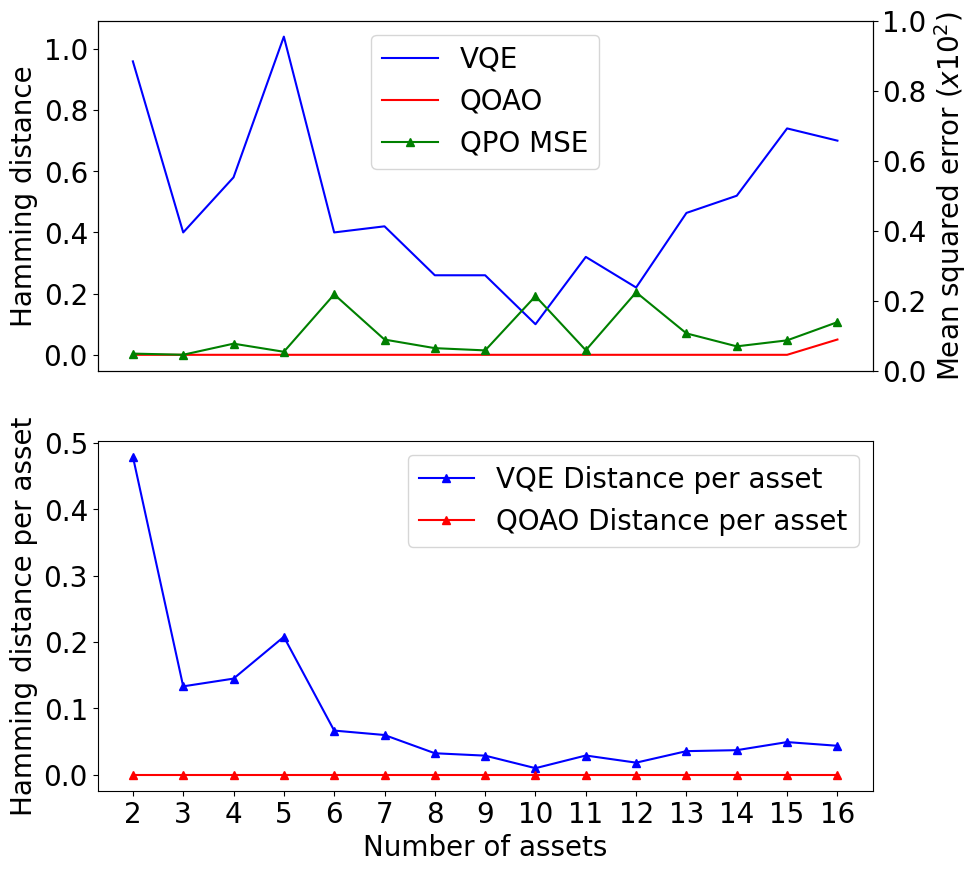

In [61]:
accum_error_vqes, accum_error_qoaos, accum_error_qpos = [], [], []
accum_error_vqes_std, accum_error_qoaos_std, accum_error_qpo_std = [], [], []

# plot as 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.rcParams.update({'font.size': 20})
num_assets = range(2, 17)
for i in num_assets:
    result = pd.read_csv(f'./result_{i}.csv')
    accum_error_vqe, accum_error_qoao = [], []
    for j in range(0, len(result)):
        accum_error_vqe.append(po.hamming(ast.literal_eval(result['list selection numpy'][j]), ast.literal_eval(result['list selection vqe'][j])))
        accum_error_qoao.append(po.hamming(ast.literal_eval(result['list selection numpy'][j]), ast.literal_eval(result['list selection qoao'][j])))
    accum_error_vqes.append(np.nanmean(accum_error_vqe))
    accum_error_vqes_std.append(np.nanstd(accum_error_vqe))
    accum_error_qoaos.append(np.nanmean(accum_error_qoao))
    accum_error_qoaos_std.append(np.nanstd(accum_error_qoao))

    result = pd.read_csv(f'./compare_{i}.csv')
    accum_error_qpo = []
    for j in range(0, len(result)):
        accum_error_qpo.append(abs(result['numpy'][i] - result['qpo'][i]))
    accum_error_qpos.append(np.nanmean(accum_error_qpo))
    accum_error_qpo_std.append(np.nanstd(accum_error_qpo))
#plt.fill_between(num_assets, np.array(accum_error_vqes) - np.array(accum_error_vqes_std), np.array(accum_error_vqes) + np.array(accum_error_vqes_std), alpha=0.2)
# plot with mean and std for me
ax[0].plot(num_assets, accum_error_vqes, color = 'blue', label = 'VQE')
#plt.fill_between(num_assets, np.array(accum_error_qoaos) - np.array(accum_error_qoaos_std), np.array(accum_error_qoaos) + np.array(accum_error_qoaos_std), alpha=0.2)
ax[0].plot(num_assets, accum_error_qoaos, color = 'red', label = 'QOAO')
plt.xlabel('Number of assets')
ax[0].set_ylabel('Hamming distance')
ax[0].plot(num_assets, 10**2*np.array(accum_error_qpos), marker = '^', color = 'green', label = 'QPO MSE')
ax[1].plot(num_assets, [float(accum_error_vqes[i-2]/i) for i in num_assets], marker = '^', color = 'blue', label = 'VQE Distance per asset')
ax[1].plot(num_assets, [float(accum_error_qoao[i-2]/i) for i in num_assets], marker = '^', color = 'red', label = 'QOAO Distance per asset')
# clear the axis x of x[0]
ax[0].set_xticks([])
ax[0].legend()
plt.legend()
# plot a right y axis for me
ax[0].twinx()
ax[1].set_ylabel("Hamming distance per asset")
ax[1].set_xticks(range(2, 17))
plt.ylabel('Mean squared error $(x 10^2)$')
plt.savefig('hamming_distance.pdf', format='pdf', dpi=300)